In [2]:
import pandas as pd
pd.set_option('float_format', '{:f}'.format)

# Build ratings dataframes

In [3]:
ratings_1_2 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_1_2.csv')
ratings_3_5 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_3_5.csv')
ratings_6_9 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_6_9.csv')
ratings_10_13 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_10_13.csv')
ratings_14_19 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_14_19.csv')

In [4]:
ratings_1_2.head()

,user_id,movie_id,rating,CBF,CF
0,1,1193,5,0,4
1,1,661,3,0,3
2,1,914,3,0,4
3,1,3408,4,0,4
4,1,2355,5,0,4


In [5]:
ratings_3_5.head()

,is_favourite_genre,ML_rating,ML_votes
0,1,4,1725
1,1,3,525
2,0,4,636
3,1,3,1315
4,1,3,1703


In [6]:
ratings_6_9.head()

,age_at_rating,age_at_release,born_before,gender
0,1,-24,0,1
1,1,-3,0,1
2,1,-35,0,1
3,1,1,1,1
4,1,-1,0,1


In [7]:
ratings_10_13.head()

,imdb_rating,imdb_votes,is_adult,runtime_minutes
0,8,975363,0,133
1,6,65304,0,79
2,7,93493,0,170
3,7,191717,0,131
4,7,283979,0,95


In [8]:
ratings_14_19.head()

,is_english,budget,popularity,TMDB_rating,TMDB_votes,revenue
0,1,3000000,3000000,8,8435,108981275
1,1,38000000,38000000,6,1035,28946127
2,1,17000000,17000000,7,988,72661442
3,1,52000000,52000000,7,2451,256271286
4,1,120000000,120000000,7,7552,363258859


In [9]:
ratings = ratings_1_2.copy(deep='True')

for col in ratings_3_5.columns: 
  ratings[col] = ratings_3_5[col]

for col in ratings_6_9.columns: 
  ratings[col] = ratings_6_9[col]

for col in ratings_10_13.columns: 
  ratings[col] = ratings_10_13[col]

for col in ratings_14_19.columns: 
  ratings[col] = ratings_14_19[col]

In [10]:
ratings.tail()

,user_id,movie_id,rating,CBF,CF,is_favourite_genre,ML_rating,ML_votes,age_at_rating,age_at_release,...,imdb_rating,imdb_votes,is_adult,runtime_minutes,is_english,budget,popularity,TMDB_rating,TMDB_votes,revenue
1000204,6040,1091,1,0,1,1,2,373,25,14,...,6,54359,0,97,1,6500000,6500000,6,760,30218387
1000205,6040,1094,5,0,4,1,3,1229,25,17,...,7,54548,0,112,1,3705538,3705538,6,561,62548947
1000206,6040,562,5,0,3,1,3,478,25,20,...,7,33759,0,88,1,800000,800000,7,309,5034794
1000207,6040,1096,4,0,3,1,3,344,25,7,...,7,47081,0,150,1,12000000,12000000,7,678,30036000
1000208,6040,1097,4,0,3,1,3,2269,25,7,...,7,395780,0,115,1,10500000,10500000,7,9331,792965500


## Ratings V1 
raw ratings data

In [11]:
ratings_v1 = ratings.copy(deep=True)

## Ratings V2 

[0, 1] normalised all but ratings columns

In [12]:
ratings_v2 = ratings.copy(deep=True)

In [13]:
non_normalised_columns = ['CF', 'ML_rating', 'imdb_rating', 'TMDB_rating', 'user_id', 'movie_id', 'rating']
other_columns = list(set(list(ratings_v2.columns)) - set(non_normalised_columns))
print(other_columns)

['gender', 'CBF', 'is_english', 'age_at_rating', 'budget', 'popularity', 'born_before', 'is_adult', 'age_at_release', 'is_favourite_genre', 'TMDB_votes', 'ML_votes', 'runtime_minutes', 'imdb_votes', 'revenue']


In [14]:
for column in other_columns: 
  col = ratings_v2[column]
  ratings_v2[column] = (col - col.min())/(col.max()-col.min())

In [15]:
ratings_v2.describe()

,user_id,movie_id,rating,CBF,CF,is_favourite_genre,ML_rating,ML_votes,age_at_rating,age_at_release,...,imdb_rating,imdb_votes,is_adult,runtime_minutes,is_english,budget,popularity,TMDB_rating,TMDB_votes,revenue
count,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,...,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000
mean,3024.512348,1865.539898,3.581564,0.018058,3.085237,0.822273,3.084893,0.237886,0.522515,0.704752,...,6.689271,0.086882,0.491264,0.373634,0.961149,0.116028,0.116028,6.427419,0.115070,0.050175
std,1728.412695,1096.040689,1.117102,0.133162,0.813827,0.382283,0.633759,0.193400,0.213672,0.126661,...,0.967225,0.134412,0.065617,0.080537,0.193240,0.145856,0.145856,1.075784,0.167067,0.079931
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1506.000000,1030.000000,3.000000,0.000000,3.000000,1.000000,3.000000,0.091625,0.436364,0.649254,...,6.000000,0.013192,0.500000,0.322034,1.000000,0.008000,0.008000,6.000000,0.016172,0.003520
50%,3070.000000,1835.000000,4.000000,0.000000,3.000000,1.000000,3.000000,0.187919,0.436364,0.716418,...,7.000000,0.036772,0.500000,0.362712,1.000000,0.065000,0.065000,7.000000,0.046447,0.019050
75%,4476.000000,2770.000000,4.000000,0.000000,4.000000,1.000000,3.000000,0.327692,0.618182,0.768657,...,7.000000,0.093643,0.500000,0.413559,1.000000,0.160000,0.160000,7.000000,0.138580,0.063329
max,6040.000000,3952.000000,5.000000,1.000000,5.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000


## Ratings V3

fully normalised

In [16]:
ratings_v3 = ratings.copy(deep=True)
columns = list(ratings_v3.columns)

for column in columns: 
  col = ratings_v3[column]
  ratings_v3[column] = (col - col.min())/(col.max()-col.min())

In [17]:
ratings_v3.describe()

,user_id,movie_id,rating,CBF,CF,is_favourite_genre,ML_rating,ML_votes,age_at_rating,age_at_release,...,imdb_rating,imdb_votes,is_adult,runtime_minutes,is_english,budget,popularity,TMDB_rating,TMDB_votes,revenue
count,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,...,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000
mean,0.500664,0.471916,0.645391,0.018058,0.521309,0.822273,0.521223,0.237886,0.522515,0.704752,...,0.669896,0.086882,0.491264,0.373634,0.961149,0.116028,0.116028,0.642742,0.115070,0.050175
std,0.286208,0.277408,0.279275,0.133162,0.203457,0.382283,0.158440,0.193400,0.213672,0.126661,...,0.138175,0.134412,0.065617,0.080537,0.193240,0.145856,0.145856,0.107578,0.167067,0.079931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249213,0.260440,0.500000,0.000000,0.500000,1.000000,0.500000,0.091625,0.436364,0.649254,...,0.571429,0.013192,0.500000,0.322034,1.000000,0.008000,0.008000,0.600000,0.016172,0.003520
50%,0.508197,0.464186,0.750000,0.000000,0.500000,1.000000,0.500000,0.187919,0.436364,0.716418,...,0.714286,0.036772,0.500000,0.362712,1.000000,0.065000,0.065000,0.700000,0.046447,0.019050
75%,0.741017,0.700835,0.750000,0.000000,0.750000,1.000000,0.500000,0.327692,0.618182,0.768657,...,0.714286,0.093643,0.500000,0.413559,1.000000,0.160000,0.160000,0.700000,0.138580,0.063329
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Grammatical Evolution

## Set up

In [18]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os.path

PATH = '/content/drive/MyDrive/grape/'
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/UL-BDS/grape.git 
    print('Cloning grape in your Drive')

%cd /content/drive/MyDrive/grape/

# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

!pip install deap==1.3 

from ponyge2_adapted_files import Grammar, ge
from functions import div, plog, psqrt, exp
import algorithms

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deap import creator, base, tools
from sklearn.model_selection import train_test_split

Mounted at /content/drive
grape directory already exists
/content/drive/MyDrive/grape
     |████████████████████████████████| 152 kB 17.9 MB/s 


## V1

In [19]:
data = ratings_v1.copy(deep=True)
data = data.drop(columns = ['user_id', 'movie_id']) 

data = data.rename(columns={'rating': 'y'})

x_columns = list(set(data.columns) - set(['y']))

column_index = 1
labels = {}

for column in x_columns: 
  new_name = 'x' + str(column_index)
  data = data.rename(columns={column : new_name})
  labels[column] = new_name
  column_index += 1

print(data.head())
print(labels)

   y  x14  x15  x8  x12    x9  x3  x16  x6  x1  x13     x11  x7  x17  x2  \
0  5    0    4   1    4  1725   1  -24   0   1    8  975363   0  133   1   
1  3    0    3   1    3   525   1   -3   0   1    6   65304   0   79   1   
2  3    0    4   0    4   636   1  -35   0   1    7   93493   0  170   1   
3  4    0    4   1    3  1315   1    1   1   1    7  191717   0  131   1   
4  5    0    4   1    3  1703   1   -1   0   1    7  283979   0   95   1   

          x5        x18  x4   x10        x19  
0    3000000    3000000   8  8435  108981275  
1   38000000   38000000   6  1035   28946127  
2   17000000   17000000   7   988   72661442  
3   52000000   52000000   7  2451  256271286  
4  120000000  120000000   7  7552  363258859  
{'gender': 'x1', 'is_english': 'x2', 'age_at_rating': 'x3', 'TMDB_rating': 'x4', 'budget': 'x5', 'born_before': 'x6', 'is_adult': 'x7', 'is_favourite_genre': 'x8', 'ML_votes': 'x9', 'TMDB_votes': 'x10', 'imdb_votes': 'x11', 'ML_rating': 'x12', 'imdb_rating': 'x

In [20]:
data_train, data_test = train_test_split(data, test_size = 0.2)

In [21]:
columns = data.columns

for column in columns: 
  data = data.astype({column: 'float'})

data = data.astype({'y': 'int'})
data.dtypes

y        int64
x14    float64
x15    float64
x8     float64
x12    float64
x9     float64
x3     float64
x16    float64
x6     float64
x1     float64
x13    float64
x11    float64
x7     float64
x17    float64
x2     float64
x5     float64
x18    float64
x4     float64
x10    float64
x19    float64
dtype: object

In [22]:
print('train ' + str(data_train.shape))
print('test ' + str(data_test.shape))

train (800167, 20)
test (200042, 20)


In [23]:
train_rows = len(data_train)
test_rows = len(data_test)

cols = len(data_train.columns)

print(train_rows)
print(test_rows)
print(cols)

800167
200042
20


In [24]:
X_train = np.zeros([cols, train_rows], dtype=float)
Y_train = np.zeros([train_rows, ], dtype = float)

for i in range(cols-1): 
  for j in range(train_rows): 
    X_train[i,j] = data_train['x' + str(i+1)].iloc[j]
  
for i in range(train_rows):
  Y_train[i] = data_train['y'].iloc[i]

In [25]:
X_test = np.zeros([cols, test_rows], dtype=float)
Y_test = np.zeros([test_rows, ], dtype=float)

for i in range(cols-1): 
  for j in range(test_rows): 
    X_test[i,j] = data_test['x' + str(i+1)].iloc[j]
  
for i in range(test_rows):
  Y_test[i] = data_test['y'].iloc[i]

In [63]:
def fitness_eval(individual, points):
    #points = [X, Y]
    x = points[0]
    y = points[1]
    
    if individual.invalid == True:
        return np.NaN,

    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        return np.NaN,
    assert np.isrealobj(pred)
    
    try:
        # if(pred > 5): 
        #   pred = 5
        # if (pred < 0): 
        #   pred=0
        # fitness = np.mean(np.square(y - pred))
        fitness = np.sqrt(np.mean((pred-y)**2))
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        fitness = np.NaN
    
    # print(fitness)
    if fitness == float("inf"):
      return np.NaN,    
    return fitness,

### with filtering

In [59]:
GRAMMAR_FILE = 'rs-grammar.bnf'
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))

<e>   ::= <e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e

In [64]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", ge.selTournament, tournsize=7)

# Single-point crossover:
toolbox.register("mate", ge.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", ge.mutation_int_flip_per_codon)

In [65]:
POPULATION_SIZE = 200
MAX_GENERATIONS = 500
P_CROSSOVER = 0.9
P_MUTATION = 0.01
ELITE_SIZE = round(0.01*POPULATION_SIZE)

HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 1
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

In [66]:
# create initial population (generation 0):
population = toolbox.populationCreator(size=POPULATION_SIZE, 
                                        bnf_grammar=BNF_GRAMMAR, 
                                        min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                                        max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                                        max_tree_depth=MAX_TREE_DEPTH, 
                                        max_wraps=MAX_WRAPS,
                                        codon_size=CODON_SIZE
                                        )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

import math 
# prepare the statistics object:
#stats = tools.Statistics(key=lambda ind: ind.fitness.values if math.isnan(ind.fitness.values[0]) else None)#ind.fitness.values != np.inf else None)
#stats = tools.Statistics(key=lambda ind: ind.fitness.values[0] if not math.isnan(ind.fitness.values[0]) else np.NaN)#ind.fitness.values != np.inf else None)
stats = tools.Statistics(key=lambda ind: ind.fitness.values)# if not ind.invalid else (np.NaN,))#ind.fitness.values != np.inf else None)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

# perform the Grammatical Evolution flow:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                          bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                          max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                          points_train=[X_train, Y_train], 
                                          points_test=[X_test, Y_test], 
                                          stats=stats, halloffame=hof, verbose=True)

gen	invalid	avg        	std        	min     	max        	fitness_test	best_ind_length	avg_length	max_length	selection_time	generation_time
0  	0      	7.50239e+06	3.15198e+07	0.882791	2.06481e+08	0.883369    	4              	28.16     	160       	0             	5.22926        
1  	90     	6.3506e+07 	4.34701e+08	0.882791	3.65733e+09	0.883369    	4              	27.72     	108       	0.00277805    	2.7736         
2  	34     	1.84704e+07	9.90866e+07	0.882791	8.93441e+08	0.883369    	4              	23.015    	84        	0.00272465    	3.34791        
3  	39     	9.93839e+06	1.01352e+08	0.882791	1.04353e+09	0.883369    	4              	22.165    	93        	0.00348759    	2.87078        
4  	25     	3.48437    	3.47616    	0.882791	18.5523    	0.883369    	4              	22.77     	96        	0.00336909    	2.9985         
5  	14     	5.52375e+07	3.77945e+08	0.882791	3.62094e+09	0.883369    	4              	23.5      	102       	0.00438094    	2.95035        
6  	15     	2.70716e+07	1.6

In [67]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
fitness_test = logbook.select("fitness_test")
best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")
max_length = logbook.select("max_length")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")

header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test', 'best_ind_length', 'avg_length', 'max_length', 'selection_time', 'generation_time']

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, fitness_test, best_ind_length, avg_length, max_length, selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

,gen,invalid,avg,std,min,max,fitness_test,best_ind_length,avg_length,max_length,selection_time,generation_time
0,0,0,7502393.027362,31519821.074935,0.882791,206481239.353690,0.883369,4,28.160000,160,0.000000,5.229259
1,1,90,63506017.387598,434700621.305887,0.882791,3657332885.921203,0.883369,4,27.720000,108,0.002778,2.773603
2,2,34,18470382.667861,99086645.104236,0.882791,893440888.153611,0.883369,4,23.015000,84,0.002725,3.347915
3,3,39,9938387.755196,101351546.223031,0.882791,1043525411.592273,0.883369,4,22.165000,93,0.003488,2.870782
4,4,25,3.484368,3.476162,0.882791,18.552295,0.883369,4,22.770000,96,0.003369,2.998497
5,5,14,55237492.790582,377944792.614820,0.882791,3620941815.636024,0.883369,4,23.500000,102,0.004381,2.950346
6,6,15,27071633.997259,169412357.784264,0.882791,1626994033.176305,0.883369,4,23.285000,69,0.004999,2.997657
7,7,13,51369604.091180,418290812.044477,0.882791,4467076475.166974,0.883369,4,24.630000,77,0.003681,2.687207
8,8,9,13672709.284045,85636783.346145,0.882791,598537653.450309,0.883369,4,26.415000,81,0.002770,2.872747
9,9,8,62712562.581015,432025836.914594,0.882791,4467076475.166974,0.883369,4,27.670000,66,0.003242,2.245268


In [68]:
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
print("Test Fitness: ", fitness_eval(hof.items[0], [X_test,Y_test])[0])
print("Depth: ", hof.items[0].depth)
print("Length of the genome: ", len(hof.items[0].genome))
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')

Best individual: 
 x[14]+plog(plog(np.sin(plog(plog(np.tanh(plog(20.00))*np.tanh(plog(20.00))*20.20
))*plog(plog(plog(x[14])))*x[14]*np.sin(plog(np.sin(plog(plog(x[14]*plog(10.00))
)*21.10))))))

Training Fitness:  0.7254161378578152
Test Fitness:  0.7281447466618889
Depth:  17
Length of the genome:  382
Used portion of the genome: 0.14


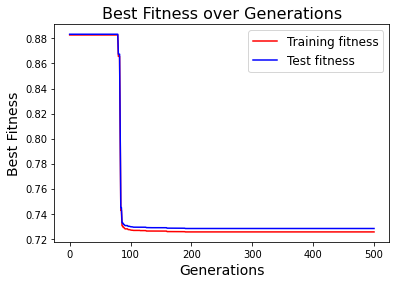

In [69]:
# Extract statistics to plot graphs:

plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
plt.plot(gen, fitness_test, color='blue', label="Test fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.show()

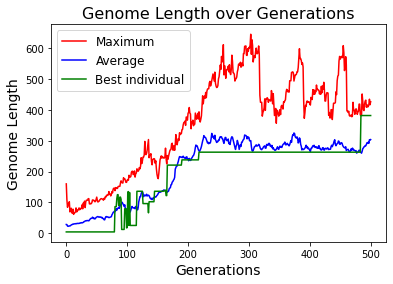

In [71]:
plt.plot(gen, max_length, color='red', label="Maximum")
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()

### Without filtering

In [72]:
GRAMMAR_FILE = 'rs-grammar-no-filtering.bnf'
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))

<e>   ::= <e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e

In [80]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", ge.selTournament, tournsize=7)

# Single-point crossover:
toolbox.register("mate", ge.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", ge.mutation_int_flip_per_codon)

POPULATION_SIZE = 200
MAX_GENERATIONS = 500
P_CROSSOVER = 0.9
# P_MUTATION = 0.01
P_MUTATION = 0.09
ELITE_SIZE = round(0.01*POPULATION_SIZE)

HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 1
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

In [81]:
# create initial population (generation 0):
population = toolbox.populationCreator(size=POPULATION_SIZE, 
                                        bnf_grammar=BNF_GRAMMAR, 
                                        min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                                        max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                                        max_tree_depth=MAX_TREE_DEPTH, 
                                        max_wraps=MAX_WRAPS,
                                        codon_size=CODON_SIZE
                                        )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

import math 
# prepare the statistics object:
#stats = tools.Statistics(key=lambda ind: ind.fitness.values if math.isnan(ind.fitness.values[0]) else None)#ind.fitness.values != np.inf else None)
#stats = tools.Statistics(key=lambda ind: ind.fitness.values[0] if not math.isnan(ind.fitness.values[0]) else np.NaN)#ind.fitness.values != np.inf else None)
stats = tools.Statistics(key=lambda ind: ind.fitness.values)# if not ind.invalid else (np.NaN,))#ind.fitness.values != np.inf else None)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

# perform the Grammatical Evolution flow:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                          bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                          max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                          points_train=[X_train, Y_train], 
                                          points_test=[X_test, Y_test], 
                                          stats=stats, halloffame=hof, verbose=True)

gen	invalid	avg       	std        	min     	max        	fitness_test	best_ind_length	avg_length	max_length	selection_time	generation_time
0  	0      	2.3036e+07	1.59262e+08	0.882791	1.48696e+09	0.883369    	1              	29.76     	172       	0             	5.01034        
1  	95     	7.59881e+06	3.42007e+07	0.882791	2.06481e+08	0.883369    	1              	30.475    	174       	0.00268435    	2.20779        
2  	45     	2.48877e+06	1.98924e+07	0.882791	2.06481e+08	0.883369    	1              	28.81     	114       	0.00263095    	2.05871        
3  	36     	1.9739e+06 	1.77114e+07	0.882791	2.06481e+08	0.883369    	1              	30.515    	117       	0.00267696    	1.90745        
4  	10     	2.62865e+07	2.89571e+08	0.880871	3.73048e+09	0.88177     	23             	32.03     	124       	0.00277281    	1.34804        
5  	10     	6146.22    	56972.5    	0.809986	617521     	0.813119    	10             	34.38     	114       	0.00266409    	0.986927       
6  	10     	5.43086e+06	5.552

In [82]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
fitness_test = logbook.select("fitness_test")
best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")
max_length = logbook.select("max_length")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")

header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test', 'best_ind_length', 'avg_length', 'max_length', 'selection_time', 'generation_time']

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, fitness_test, best_ind_length, avg_length, max_length, selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

,gen,invalid,avg,std,min,max,fitness_test,best_ind_length,avg_length,max_length,selection_time,generation_time
0,0,0,23035998.010431,159262116.384452,0.882791,1486960584.861792,0.883369,1,29.760000,172,0.000000,5.010343
1,1,95,7598807.147540,34200664.878377,0.882791,206481239.353690,0.883369,1,30.475000,174,0.002684,2.207793
2,2,45,2488770.019661,19892388.869652,0.882791,206481239.353690,0.883369,1,28.810000,114,0.002631,2.058707
3,3,36,1973896.341824,17711366.041040,0.882791,206481239.353690,0.883369,1,30.515000,117,0.002677,1.907454
4,4,10,26286478.233282,289570817.672938,0.880871,3730479546.892449,0.881770,23,32.030000,124,0.002773,1.348037
5,5,10,6146.222697,56972.522933,0.809986,617521.493043,0.813119,10,34.380000,114,0.002664,0.986927
6,6,10,5430860.445529,55527261.459940,0.809986,684002859.939370,0.813119,10,31.155000,114,0.003177,1.361466
7,7,4,5969.781139,45513.830662,0.809986,408693.468962,0.813119,10,31.910000,114,0.002777,1.575716
8,8,5,214720.511198,2818378.052856,0.809986,37284654.693099,0.813119,10,28.385000,122,0.002811,1.100856
9,9,8,1225606.749305,15819441.224949,0.775514,206268206.283244,0.778501,24,27.685000,63,0.002728,1.492152


In [83]:
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
print("Test Fitness: ", fitness_eval(hof.items[0], [X_test,Y_test])[0])
print("Depth: ", hof.items[0].depth)
print("Length of the genome: ", len(hof.items[0].genome))
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')

Best individual: 
 x[14]+plog(np.sin(psqrt(np.sin(psqrt(exp(10.20))))))*np.sin(x[14]*np.sin(plog(np
.sin(np.sin(np.sin(psqrt(plog(psqrt(02.21)))))))))

Training Fitness:  0.7265535653927074
Test Fitness:  0.729240128725394
Depth:  14
Length of the genome:  315
Used portion of the genome: 0.10


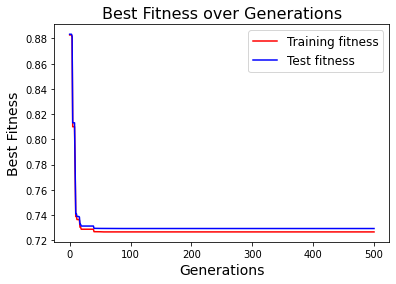

In [84]:
# Extract statistics to plot graphs:

plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
plt.plot(gen, fitness_test, color='blue', label="Test fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.show()

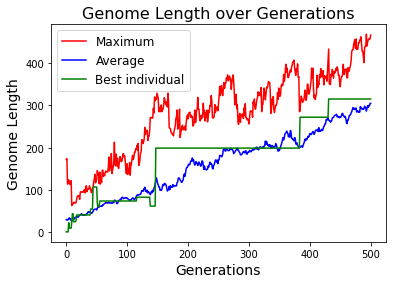

In [85]:
plt.plot(gen, max_length, color='red', label="Maximum")
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()

## V2

In [86]:
data = ratings_v2.copy(deep=True)
data = data.drop(columns = ['user_id', 'movie_id']) 

data = data.rename(columns={'rating': 'y'})

x_columns = list(set(data.columns) - set(['y']))

column_index = 1
labels = {}

for column in x_columns: 
  new_name = 'x' + str(column_index)
  data = data.rename(columns={column : new_name})
  labels[column] = new_name
  column_index += 1

print(data.head())
print(labels)

data_train, data_test = train_test_split(data, test_size = 0.2)

columns = data.columns

for column in columns: 
  data = data.astype({column: 'float'})

data = data.astype({'y': 'int'})

print('train ' + str(data_train.shape))
print('test ' + str(data_test.shape))

train_rows = len(data_train)
test_rows = len(data_test)

cols = len(data_train.columns)

print(train_rows)
print(test_rows)
print(cols)

   y    x14    x15    x8     x12    x9       x3       x16      x6       x1     x13    x11      x7       x17      x2       x5       x18    x4    x10      x19  
0  5 0.000000   4  1.000000   4  0.503064 0.000000 0.402985 0.000000 1.000000   8  0.381855 0.500000 0.440678 1.000000 0.015000 0.015000   8 0.356163 0.049821
1  3 0.000000   3  1.000000   3  0.152903 0.000000 0.559701 0.000000 1.000000   6  0.025563 0.500000 0.257627 1.000000 0.190000 0.190000   6 0.043702 0.013233
2  3 0.000000   4  0.000000   4  0.185293 0.000000 0.320896 0.000000 1.000000   7  0.036599 0.500000 0.566102 1.000000 0.085000 0.085000   7 0.041718 0.033217
3  4 0.000000   4  1.000000   3  0.383426 0.000000 0.589552 1.000000 1.000000   7  0.075054 0.500000 0.433898 1.000000 0.260000 0.260000   7 0.103492 0.117155
4  5 0.000000   4  1.000000   3  0.496644 0.000000 0.574627 0.000000 1.000000   7  0.111175 0.500000 0.311864 1.000000 0.600000 0.600000   7 0.318879 0.166064
{'gender': 'x1', 'is_english': 'x2', 'age_at_r

In [87]:
X_train = np.zeros([cols, train_rows], dtype=float)
Y_train = np.zeros([train_rows, ], dtype = float)

for i in range(cols-1): 
  for j in range(train_rows): 
    X_train[i,j] = data_train['x' + str(i+1)].iloc[j]
  
for i in range(train_rows):
  Y_train[i] = data_train['y'].iloc[i]

In [88]:
X_test = np.zeros([cols, test_rows], dtype=float)
Y_test = np.zeros([test_rows, ], dtype=float)

for i in range(cols-1): 
  for j in range(test_rows): 
    X_test[i,j] = data_test['x' + str(i+1)].iloc[j]
  
for i in range(test_rows):
  Y_test[i] = data_test['y'].iloc[i]

In [89]:
def fitness_eval(individual, points):
    #points = [X, Y]
    x = points[0]
    y = points[1]
    
    if individual.invalid == True:
        return np.NaN,

    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        return np.NaN,
    assert np.isrealobj(pred)
    
    try:
        # if(pred > 5): 
        #   pred = 5
        # if (pred < 0): 
        #   pred=0
        # fitness = np.mean(np.square(y - pred))
        fitness = np.sqrt(np.mean((pred-y)**2))
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        fitness = np.NaN
    
    # print(fitness)
    if fitness == float("inf"):
      return np.NaN,    
    return fitness,

### exp 3

In [90]:
GRAMMAR_FILE = 'rs-grammar.bnf'
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))

<e>   ::= <e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e

In [91]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", ge.selTournament, tournsize=7)

# Single-point crossover:
toolbox.register("mate", ge.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", ge.mutation_int_flip_per_codon)

POPULATION_SIZE = 200
MAX_GENERATIONS = 500
P_CROSSOVER = 0.9
P_MUTATION = 0.01
ELITE_SIZE = round(0.01*POPULATION_SIZE)

HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 1
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

In [92]:
# create initial population (generation 0):
population = toolbox.populationCreator(size=POPULATION_SIZE, 
                                        bnf_grammar=BNF_GRAMMAR, 
                                        min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                                        max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                                        max_tree_depth=MAX_TREE_DEPTH, 
                                        max_wraps=MAX_WRAPS,
                                        codon_size=CODON_SIZE
                                        )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

import math 
# prepare the statistics object:
#stats = tools.Statistics(key=lambda ind: ind.fitness.values if math.isnan(ind.fitness.values[0]) else None)#ind.fitness.values != np.inf else None)
#stats = tools.Statistics(key=lambda ind: ind.fitness.values[0] if not math.isnan(ind.fitness.values[0]) else np.NaN)#ind.fitness.values != np.inf else None)
stats = tools.Statistics(key=lambda ind: ind.fitness.values)# if not ind.invalid else (np.NaN,))#ind.fitness.values != np.inf else None)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

# perform the Grammatical Evolution flow:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                          bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                          max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                          points_train=[X_train, Y_train], 
                                          points_test=[X_test, Y_test], 
                                          stats=stats, halloffame=hof, verbose=True)

gen	invalid	avg        	std        	min     	max        	fitness_test	best_ind_length	avg_length	max_length	selection_time	generation_time
0  	0      	5.47328e+07	4.86476e+08	0.882961	4.37862e+09	0.88269     	1              	29.645    	178       	0             	5.0549         
1  	91     	1764.97    	10507.8    	0.882961	67504.3    	0.88269     	1              	29.365    	144       	0.00337005    	2.67646        
2  	35     	3211.79    	24469.3    	0.882961	198788     	0.88269     	1              	27.23     	150       	0.00383902    	2.7444         
3  	20     	1.83745e+15	2.18957e+16	0.882961	2.62755e+17	0.88269     	1              	33.435    	156       	0.00286698    	2.31078        
4  	14     	226.668    	2858.26    	0.882961	36494      	0.88269     	1              	27.435    	152       	0.00280118    	1.912          
5  	4      	1.07567    	0.806462   	0.882961	7.60128    	0.88269     	1              	25.845    	155       	0.00271726    	1.37838        
6  	1      	0.926148   	0.5

In [93]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
fitness_test = logbook.select("fitness_test")
best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")
max_length = logbook.select("max_length")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")

header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test', 'best_ind_length', 'avg_length', 'max_length', 'selection_time', 'generation_time']

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, fitness_test, best_ind_length, avg_length, max_length, selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

,gen,invalid,avg,std,min,max,fitness_test,best_ind_length,avg_length,max_length,selection_time,generation_time
0,0,0,54732785.056039,486475592.946990,0.882961,4378622434.447766,0.882690,1,29.645000,178,0.000000,5.054902
1,1,91,1764.971285,10507.798627,0.882961,67504.325103,0.882690,1,29.365000,144,0.003370,2.676463
2,2,35,3211.793043,24469.279408,0.882961,198787.894553,0.882690,1,27.230000,150,0.003839,2.744403
3,3,20,1837450429925265.250000,21895748895739612.000000,0.882961,262755411479275200.000000,0.882690,1,33.435000,156,0.002867,2.310779
4,4,14,226.668385,2858.262955,0.882961,36493.953725,0.882690,1,27.435000,152,0.002801,1.911998
5,5,4,1.075674,0.806462,0.882961,7.601280,0.882690,1,25.845000,155,0.002717,1.378379
6,6,1,0.926148,0.557570,0.882961,8.611519,0.882690,1,22.730000,144,0.003036,1.051700
7,7,2,0.884918,0.027259,0.882961,1.264598,0.882690,1,23.325000,144,0.002575,0.987129
8,8,0,0.882961,0.000000,0.882961,0.882961,0.882690,1,25.950000,144,0.002647,0.930969
9,9,1,0.962330,0.781708,0.882961,8.710684,0.882690,1,29.480000,144,0.004331,0.945781


In [94]:
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
print("Test Fitness: ", fitness_eval(hof.items[0], [X_test,Y_test])[0])
print("Depth: ", hof.items[0].depth)
print("Length of the genome: ", len(hof.items[0].genome))
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')

Best individual: 
 x[14]

Training Fitness:  0.8829607886969126
Test Fitness:  0.8826898551077468
Depth:  2
Length of the genome:  1
Used portion of the genome: 1.00


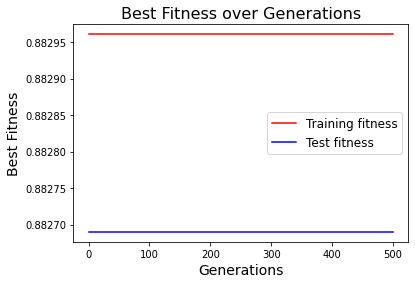

In [95]:
# Extract statistics to plot graphs:

plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
plt.plot(gen, fitness_test, color='blue', label="Test fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.show()

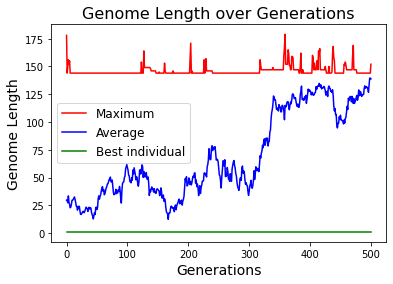

In [96]:
plt.plot(gen, max_length, color='red', label="Maximum")
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()

### exp 4

In [97]:
GRAMMAR_FILE = 'rs-grammar-no-filtering.bnf'
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))

<e>   ::= <e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e

In [98]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", ge.selTournament, tournsize=7)

# Single-point crossover:
toolbox.register("mate", ge.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", ge.mutation_int_flip_per_codon)

POPULATION_SIZE = 200
MAX_GENERATIONS = 500
P_CROSSOVER = 0.9
P_MUTATION = 0.01
ELITE_SIZE = round(0.01*POPULATION_SIZE)

HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 1
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

In [ ]:
# create initial population (generation 0):
population = toolbox.populationCreator(size=POPULATION_SIZE, 
                                        bnf_grammar=BNF_GRAMMAR, 
                                        min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                                        max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                                        max_tree_depth=MAX_TREE_DEPTH, 
                                        max_wraps=MAX_WRAPS,
                                        codon_size=CODON_SIZE
                                        )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

import math 
# prepare the statistics object:
#stats = tools.Statistics(key=lambda ind: ind.fitness.values if math.isnan(ind.fitness.values[0]) else None)#ind.fitness.values != np.inf else None)
#stats = tools.Statistics(key=lambda ind: ind.fitness.values[0] if not math.isnan(ind.fitness.values[0]) else np.NaN)#ind.fitness.values != np.inf else None)
stats = tools.Statistics(key=lambda ind: ind.fitness.values)# if not ind.invalid else (np.NaN,))#ind.fitness.values != np.inf else None)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

# perform the Grammatical Evolution flow:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                          bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                          max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                          points_train=[X_train, Y_train], 
                                          points_test=[X_test, Y_test], 
                                          stats=stats, halloffame=hof, verbose=True)

gen	invalid	avg    	std    	min     	max    	fitness_test	best_ind_length	avg_length	max_length	selection_time	generation_time
0  	0      	7.86584	27.3131	0.882961	252.621	0.88269     	1              	29.265    	175       	0             	5.77027        
1  	83     	4.025  	3.86808	0.882961	19.7604	0.88269     	1              	26.81     	163       	0.00263619    	2.82551        
2  	36     	1282.78	14067.8	0.882961	156028 	0.88269     	1              	25.59     	127       	0.0031352     	2.99761        
3  	12     	2.03173	2.10606	0.882961	18.4526	0.88269     	1              	25.97     	127       	0.00320363    	2.52157        
4  	11     	1.33927	0.926143	0.882961	8.50246	0.88269     	1              	29.735    	127       	0.00293446    	2.12489        
5  	7      	1.81431	10.1159 	0.882961	128.041	0.88269     	1              	28.425    	125       	0.00360847    	1.82323        
6  	3      	1.7236 	9.78047 	0.882961	128.041	0.88269     	1              	29.6      	101       	0.00290585  

In [ ]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
fitness_test = logbook.select("fitness_test")
best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")
max_length = logbook.select("max_length")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")

header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test', 'best_ind_length', 'avg_length', 'max_length', 'selection_time', 'generation_time']

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, fitness_test, best_ind_length, avg_length, max_length, selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

In [ ]:
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
print("Test Fitness: ", fitness_eval(hof.items[0], [X_test,Y_test])[0])
print("Depth: ", hof.items[0].depth)
print("Length of the genome: ", len(hof.items[0].genome))
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')

In [ ]:
# Extract statistics to plot graphs:

plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
plt.plot(gen, fitness_test, color='blue', label="Test fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.show()

In [ ]:
plt.plot(gen, max_length, color='red', label="Maximum")
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()